## **1.Line Plot**

In [290]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('ggplot')
np.random.seed(37)

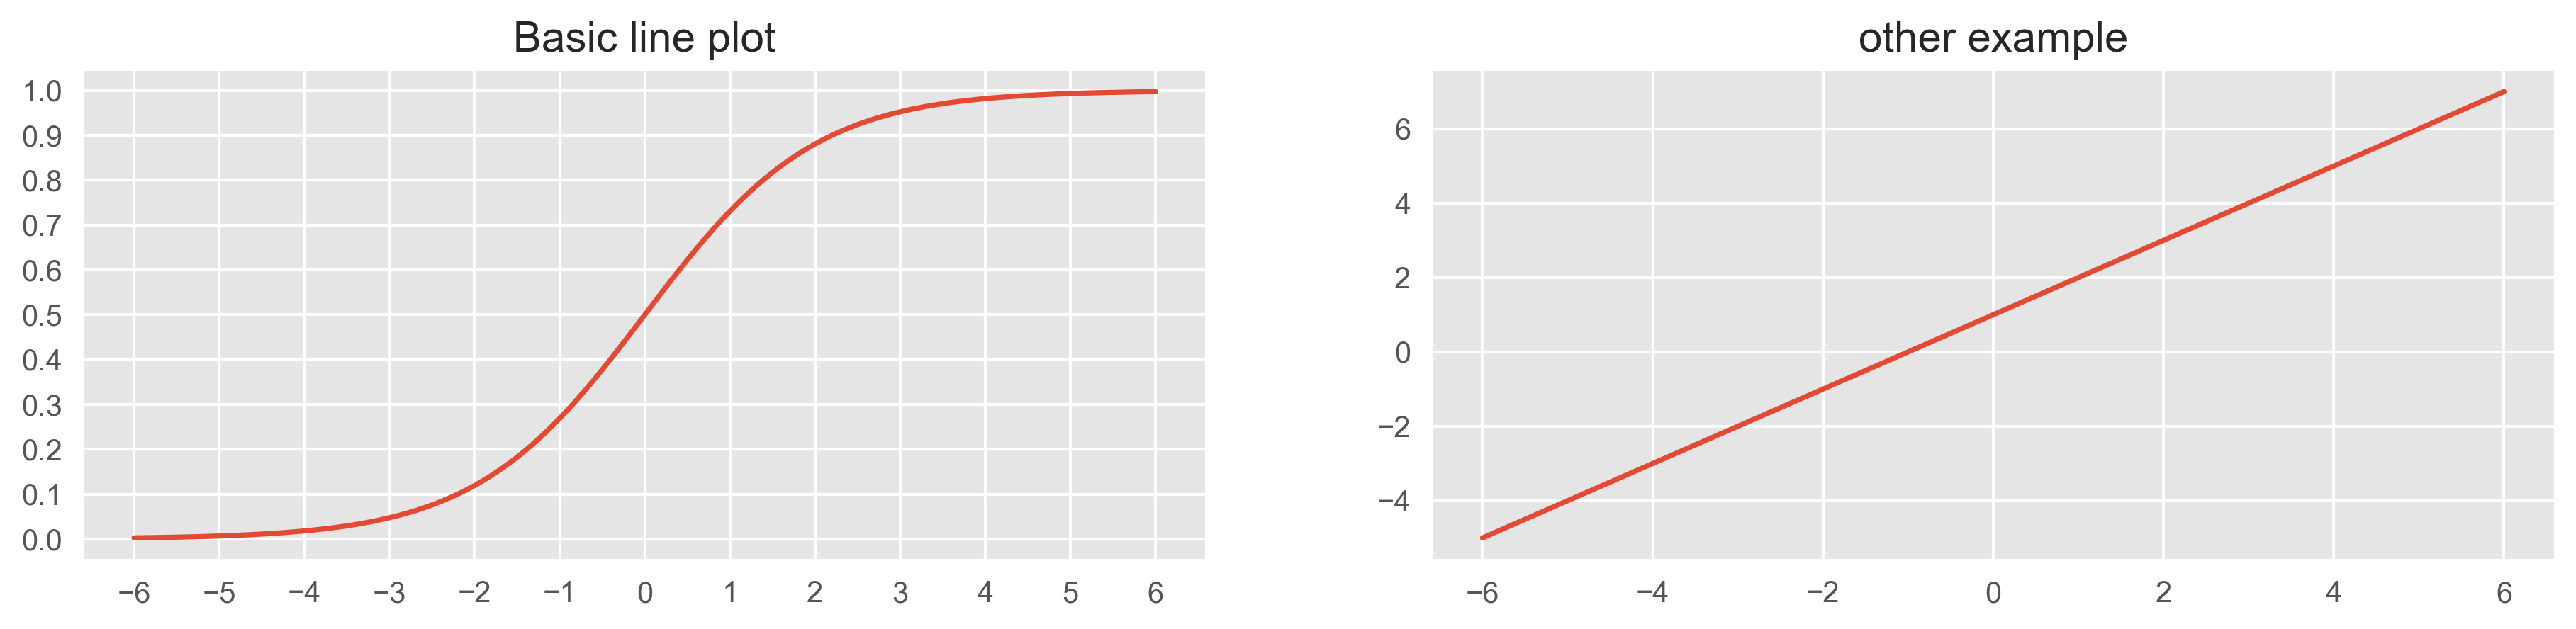

In [291]:
from scipy.special import expit as logistic

x = np.arange(-6, 6.1, 0.1)
y = logistic(x)
s = pd.Series(y,x)

fig, ax = plt.subplots(1,2,figsize=(15,3), dpi=300)

ax[0].plot(x,y)
ax[0].set_title('Basic line plot')
ax[0].set_xticks(np.arange(-6,6.1,1))
ax[0].set_yticks(np.arange(0,1.1,0.1))

ax[1].plot(x,x+1)
ax[1].set_title('other example')
plt.show()

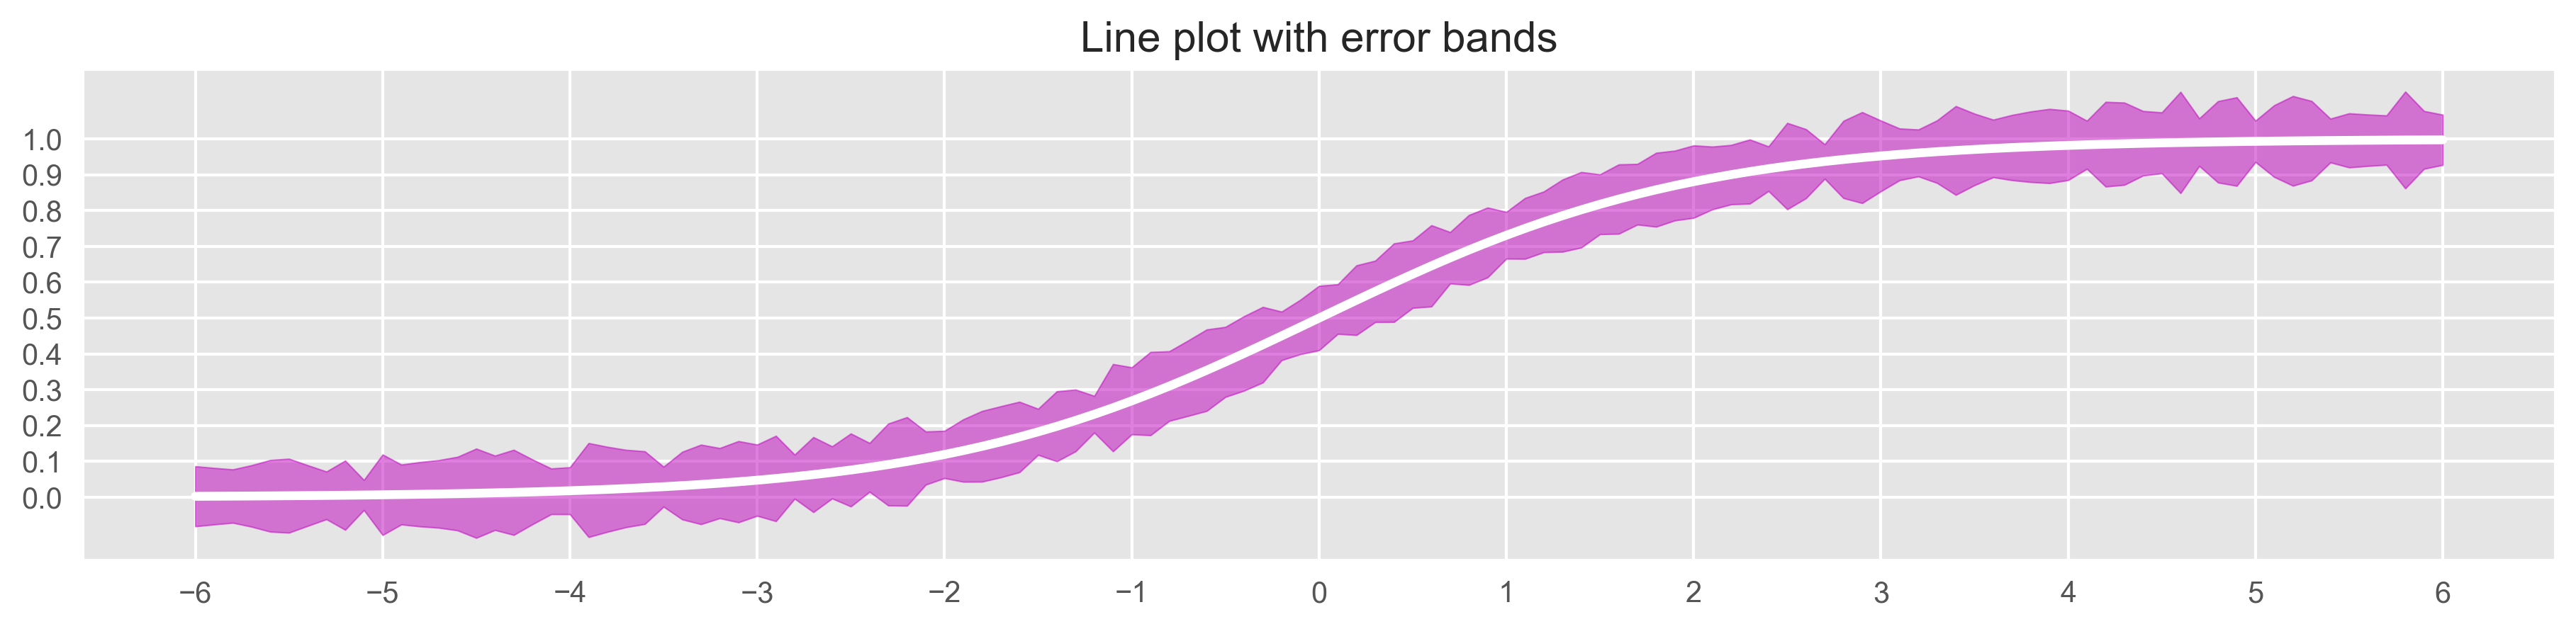

In [292]:
x = np.arange(-6, 6.1, 0.1)
y = logistic(x)

sd = (y+(0.1*np.random.randn(10,y.shape[0]))).std(axis=0)
y_p = y + sd
y_n = y - sd

s = pd.Series(y,x)

fig, ax = plt.subplots(figsize=(15,3), dpi=300)

s.plot.line(x,y,color='w',lw='3', ax=ax)
ax.fill_between(x, y_p, y_n, color='m', alpha=0.5)
ax.set_title('Line plot with error bands')
ax.set_xticks(np.arange(-6, 6.1, 1))
ax.set_yticks(np.arange(0, 1.1, 0.1))
# ax.spines['top'].set_alpha(0)
# ax.spines['bottom'].set_alpha(1)
# ax.spines['right'].set_alpha(0)
# ax.spines['left'].set_alpha(1)

plt.show()

## **2.Bar Plot**

In [293]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn')

/var/folders/06/gmp4cfpd1kn490jzvs864zh00000gn/T/ipykernel_18611/1215229944.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


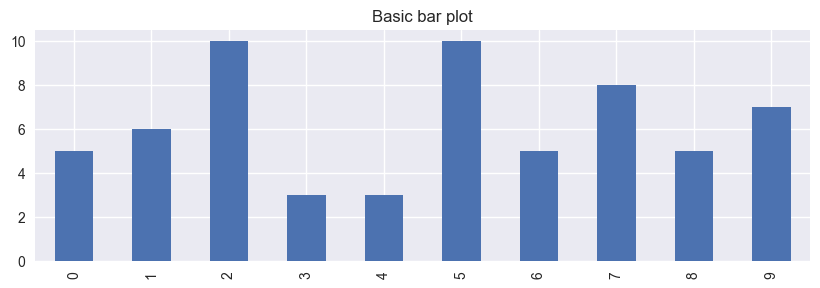

In [294]:
import numpy as np
import pandas as pd

np.random.seed(37)

s = pd.Series(np.random.randint(0, 11, size=10))
# print(s)

fig, ax = plt.subplots(figsize=(10,3))

s.plot(kind='bar',ax=ax)
ax.set_title('Basic bar plot')
plt.show()

Text(0.5, 1.0, 'Bar plot, color bars')

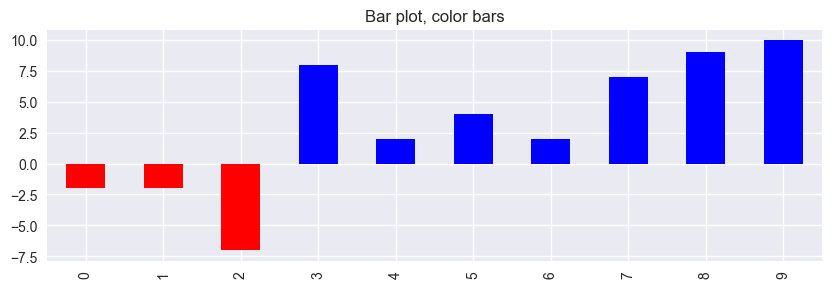

In [295]:
s = pd.Series(np.random.randint(-10, 11, size=10))

fig ,ax = plt.subplots(figsize=(10,3))
s.plot(kind='bar', ax=ax, color=(s>0).map({True:'b',False:'r'}))
ax.set_title('Bar plot, color bars')

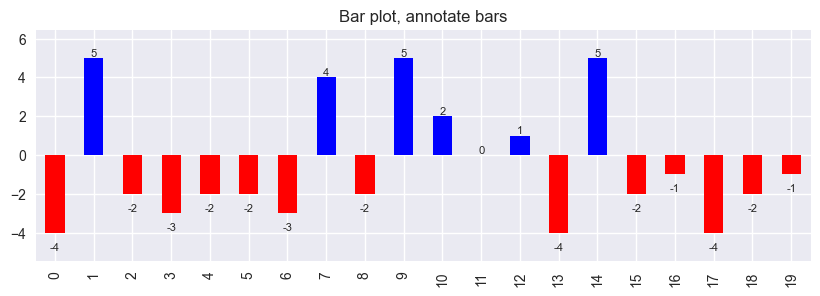

In [296]:
s = pd.Series(np.random.randint(-5, 6, size=20))
# print(s)

fig, ax = plt.subplots(figsize=(10,3))
s.plot(kind='bar', ax=ax, color=(s>0).map({True:'b',False:'r'}))
ax.set_title('Bar plot, annotate bars')

for i, v in enumerate(s.values):
    params = {
        'x': i,
        'y': v if v >= 0 else v -1.0, # 数字摆放的位置
        's': v,
        'horizontalalignment': 'center',
        'verticalalignment': 'bottom',
        'fontdict': {
            'fontweight': 500,
            'size': 8
        }
    }
    ax.text(**params)


y_min, y_max = ax.get_ylim()
ax.set_ylim(y_min-1.0, y_max+1.0)


plt.show()

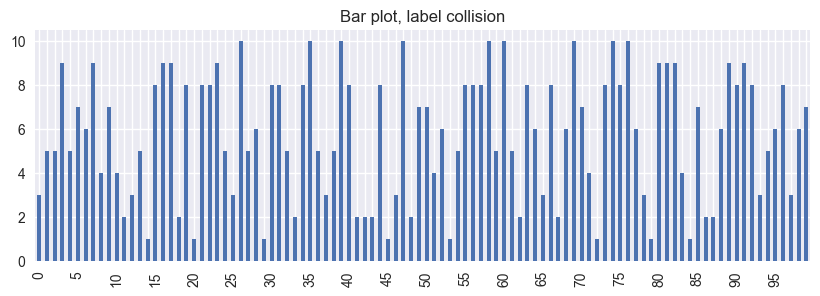

In [297]:
s = pd.Series(np.random.randint(1,11,size=100))

fig, ax = plt.subplots(figsize=(10,3))
s.plot(kind='bar',ax=ax)
ax.set_title('Bar plot, label collision')

n_th = 5
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % n_th !=0:
        label.set_visible(False)

In [298]:
n = 5

labels = [f'y{i}' for i in range(n)]
columns = [f'x{i}' for i in range(n)]

df = pd.DataFrame(np.random.randint(0, 11, size=(n,n)), index=labels, columns=columns)
df

,x0,x1,x2,x3,x4
y0,9,1,4,2,6
y1,1,5,5,2,6
y2,10,1,7,2,10
y3,6,8,3,10,10
y4,5,5,0,2,3


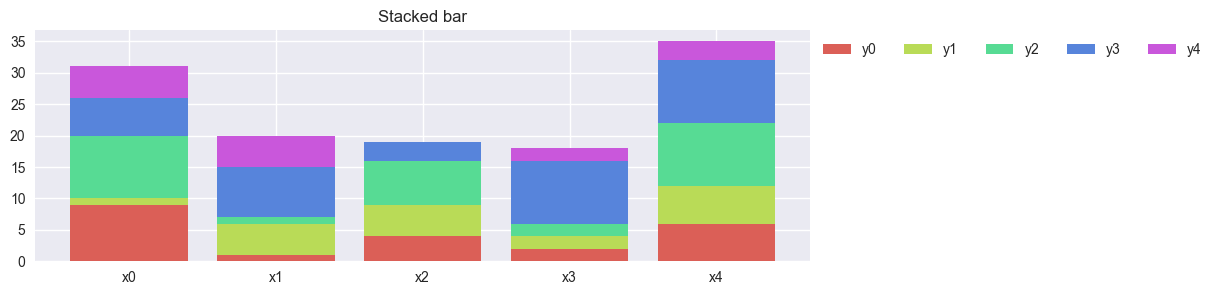

In [299]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,3))
colors = sns.color_palette('hls',df.shape[0])

prev = []


for color, label in zip(colors, labels):
    if len(prev) == 0:
        ax.bar(columns, df.loc[label], color=color, label=label)
    else:
        s = df.loc[prev].sum()
        ax.bar(columns, df.loc[label], color=color, label=label, bottom=s)
    prev.append(label)

ax.legend(bbox_to_anchor=(1,1), loc='best', ncol=5)
ax.set_title('Stacked bar')


plt.show()


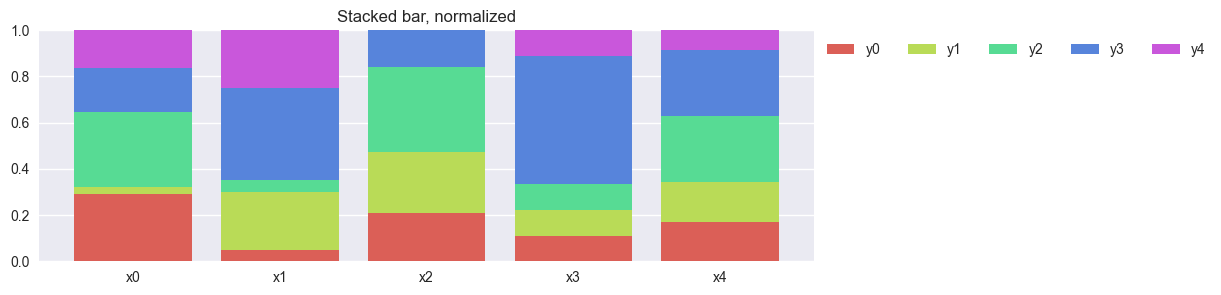

In [300]:
fig, ax = plt.subplots(figsize=(10, 3))

colors = sns.color_palette('hls', df.shape[0])

p_df = df / df.sum()

prev = []
for color, label in zip(colors, labels):
    if len(prev) == 0:
        ax.bar(columns, p_df.loc[label], color=color, label=label)
    else:
        s = p_df.loc[prev].sum()
        ax.bar(columns, p_df.loc[label], color=color, label=label, bottom=s)
    prev.append(label)

ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=5)
ax.set_title('Stacked bar, normalized')

plt.show()

In [301]:
n = 5
m = 10

labels = [f'y{i}' for i in range(n)]
columns = [f'x{i}' for i in range(m)]

df = pd.DataFrame(np.random.randint(0,11,size=(n,m)), index=labels, columns=columns)
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9
y0,3,3,4,5,1,5,0,7,4,6
y1,3,9,2,8,2,10,6,9,4,6
y2,6,10,3,4,7,0,9,7,1,1
y3,0,10,8,3,0,5,7,1,2,6
y4,10,8,5,9,10,5,9,10,6,8


Text(0.5, 1.0, 'Stacked bar, series')

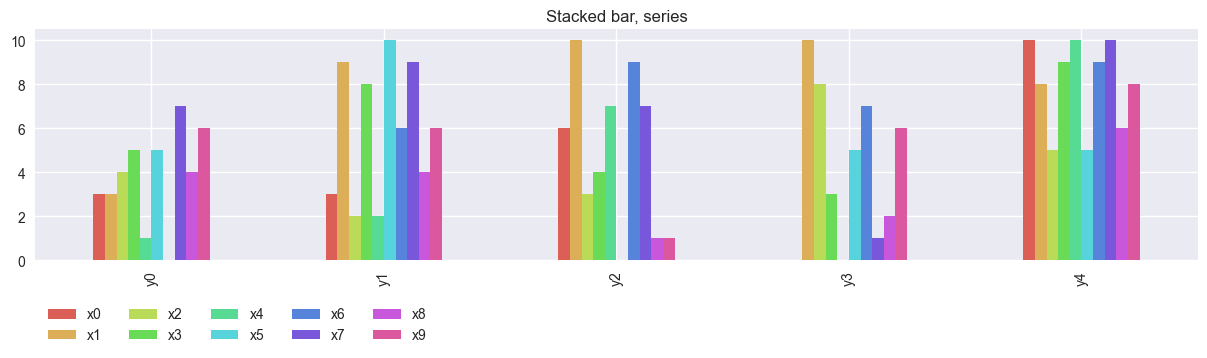

In [302]:
fig , ax = plt.subplots(figsize=(15,3))

colors = sns.color_palette('hls',df.shape[1])

df.plot(kind='bar', color=colors, ax=ax)

ax.legend(bbox_to_anchor=(0,-0.15), loc='upper left', ncol=5)
ax.set_title('Stacked bar, series')

## **3.Heat Map**

In [303]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-white')

Text(0.5, 1.0, 'Basic heatmap plot')

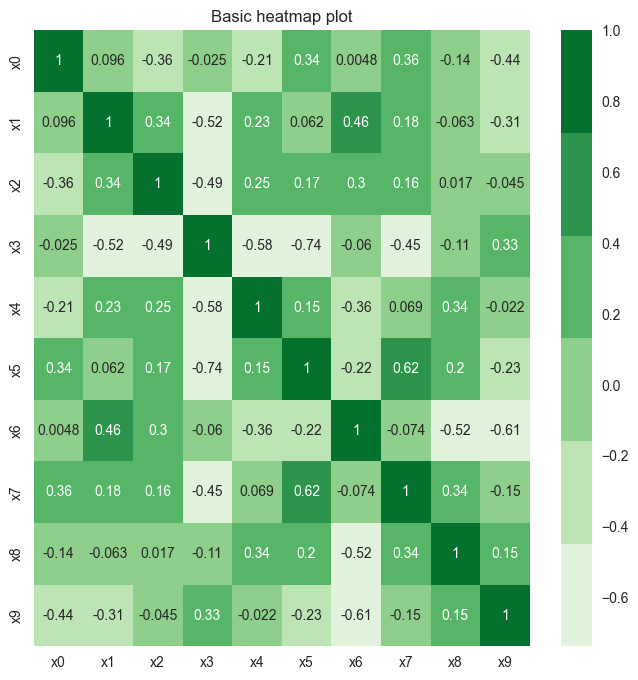

In [304]:
import numpy as np
import pandas as pd
import seaborn as sns

np.random.seed(37)

n = 10
labels = [f'x{i}' for i in range(n)]
df = pd.DataFrame(np.random.randint(0,11,size=(n,n)), index=labels, columns=labels)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cmap=sns.color_palette('Greens'))
ax.set_title('Basic heatmap plot')

# y_min, y_max = ax.get_ylim()
# dh = 0.8
# ax.set_ylim(y_min-dh, y_max+dh)

## **7.Pie Chart**

In [305]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('bmh')
np.random.seed(37)

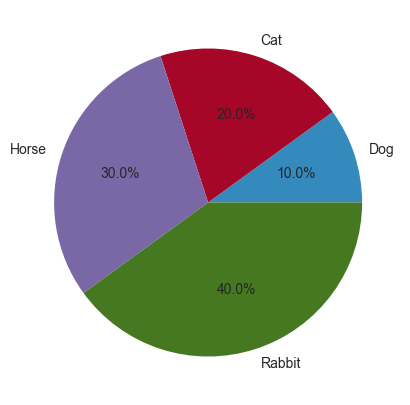

In [306]:
s = pd.Series([10,20,30,40],index=['Dog','Cat','Horse','Rabbit'])

fig, ax = plt.subplots(figsize=(5,5))
s.plot(kind='pie', autopct='%1.1f%%', ax=ax)
ax.yaxis.set_visible(True)

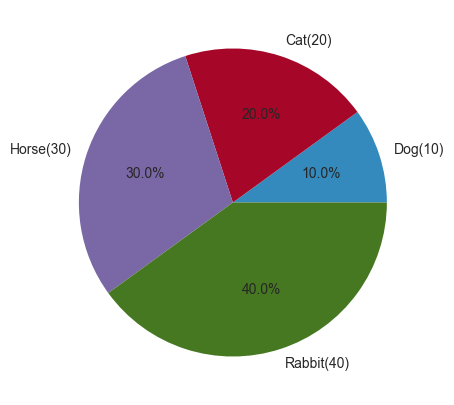

In [307]:
s = pd.Series([10,20,30,40],index=['Dog','Cat','Horse','Rabbit'])

fig, ax = plt.subplots(figsize=(5,5))

labels = [f'{i}({v})' for i,v in zip(s.index, s.values)]
s.plot(kind='pie', autopct='%1.1f%%', ax=ax, labels=labels)
ax.yaxis.set_visible(True)

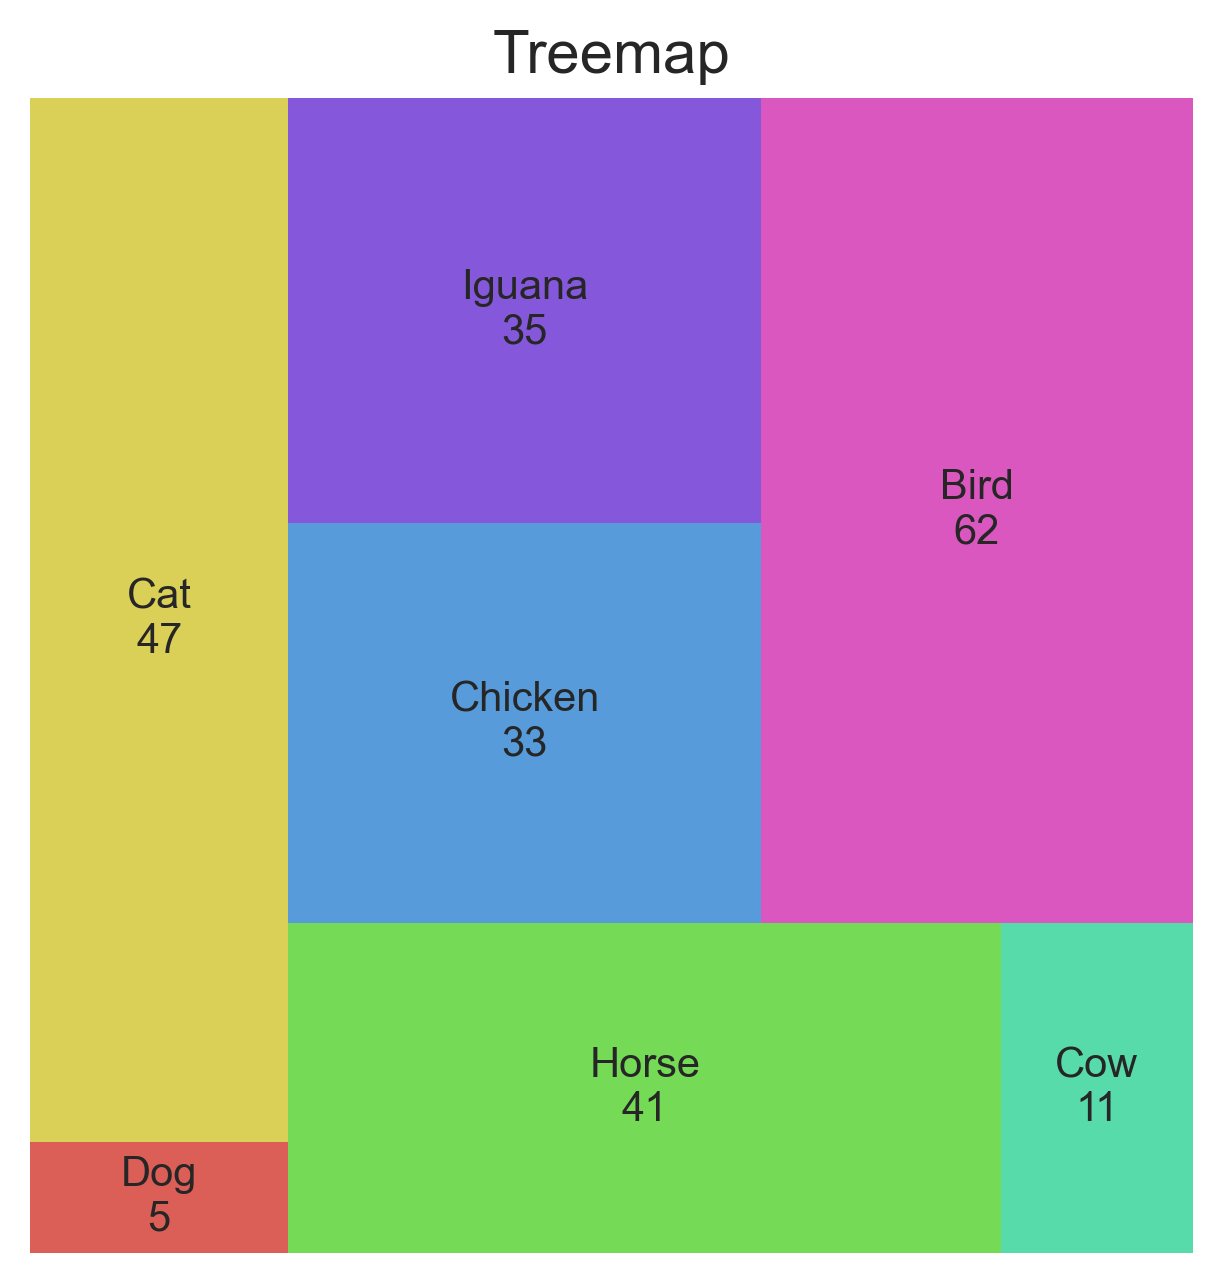

In [308]:
import squarify

s = pd.Series([5, 47, 41, 11, 33, 35, 62], index=['Dog', 'Cat', 'Horse', 'Cow', 'Chicken', 'Iguana', 'Bird'])

colors = sns.color_palette('hls',len(s))
labels = [f'{i}\n{v}' for i, v in zip(s.index, s.values)]

fig, ax = plt.subplots(figsize=(5,5),dpi=300)
squarify.plot(sizes=s.values, label=labels, color=colors, ax=ax)
plt.title('Treemap')
plt.axis('off')

plt.show()

## **4.Distribution Plot**

Text(0.5, 1.0, 'Density plot, bandwidth=silverman')

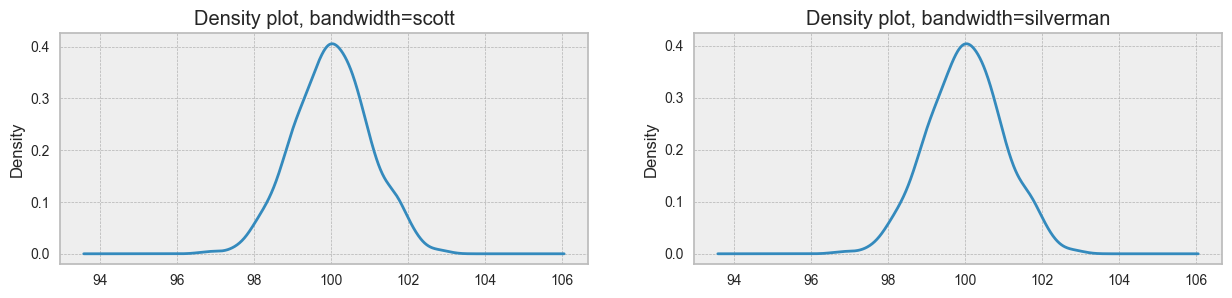

In [309]:
sigma = 1.0
mu = 100.0

x = sigma * np.random.randn(1000) + mu
s = pd.Series(x)

fig, ax = plt.subplots(1,2,figsize=(15,3))
s.plot(kind='kde',bw_method='scott', ax=ax[0])
s.plot(kind='kde',bw_method='silverman',ax=ax[1])

ax[0].set_title('Density plot, bandwidth=scott')
ax[1].set_title('Density plot, bandwidth=silverman')

Text(0.5, 1.0, 'Multiple densities')

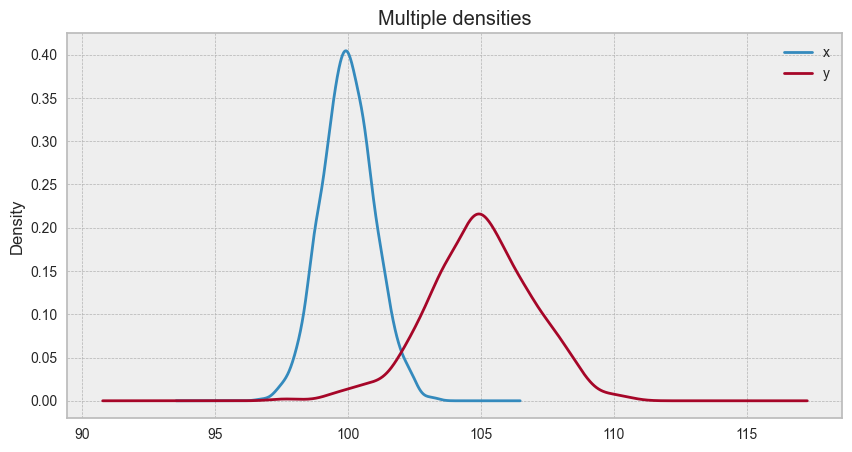

In [310]:
df = pd.DataFrame({
    'x':1.0 * np.random.randn(1000) +100,
    'y':2.0 *np.random.randn(1000) +105
})

fig, ax = plt.subplots(figsize=(10,5))
df.plot(kind='kde',ax=ax)
ax.set_title('Multiple densities')

Text(0.5, 1.0, 'Density with cumulative distribution plots')

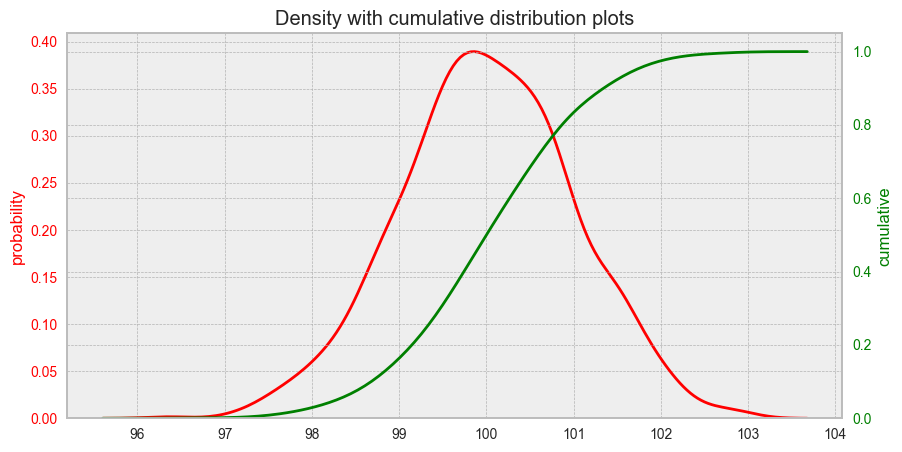

In [311]:
sigma = 1.0
mu =100

x = sigma * np.random.randn(1000) + mu
fig, ax1 = plt.subplots(figsize=(10,5))

sns.kdeplot(x, ax=ax1, color='r', label='density')

ax2 = ax1.twinx()
sns.kdeplot(x, ax=ax2, cumulative=True, color='g', label='cumulative')

ax1.set_ylabel('probability', color='r')
ax2.set_ylabel('cumulative',color='g')

ax1.tick_params(axis='y', labelcolor='r')
ax2.tick_params(axis='y', labelcolor='g')

ax1.legend().set_visible(False)
ax2.legend().set_visible(False)

ax1.set_title('Density with cumulative distribution plots')

Text(0.5, 1.0, 'Density plot with histogram')

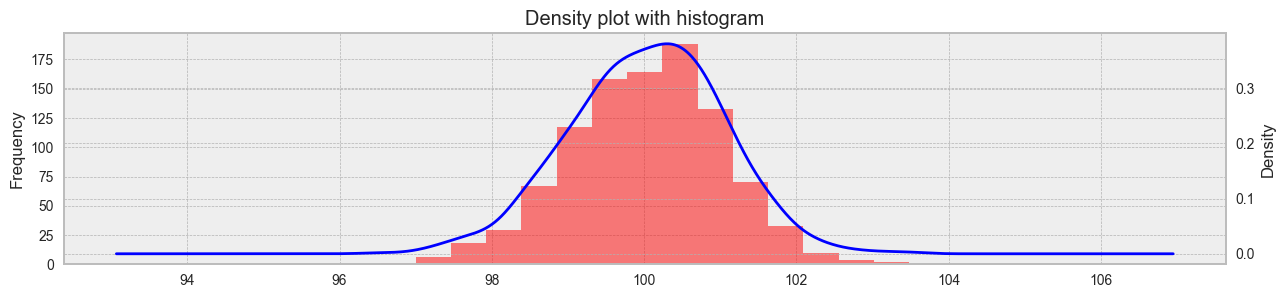

In [312]:
sigma = 1
mu = 100.0

x = sigma * np.random.randn(1000) + mu
s = pd.Series(x)

fig, ax = plt.subplots(figsize=(15,3))
ax1, ax2 = ax, ax.twinx()

s.plot(kind='hist', bins=15, alpha=0.5, color='r', ax=ax1)
s.plot(kind='kde', bw_method='scott', color='b', ax=ax2)

ax.set_title('Density plot with histogram')

## **8. Scatter Plot**

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('ggplot')
np.random.seed(37)

Text(0.5, 1.0, 'Basic scatter plot')

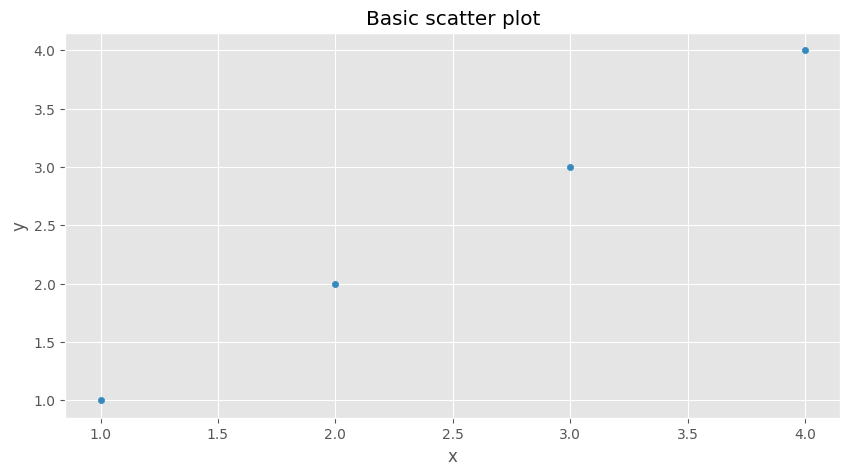

In [4]:
df = pd.DataFrame({
    'x':[1,2,3,4],
    'y':[1,2,3,4]
})

fig, ax = plt.subplots(figsize=(10,5))
df.plot(kind='scatter',x='x',y='y',ax=ax)
ax.set_title('Basic scatter plot')

Text(0.5, 1.0, 'change size')

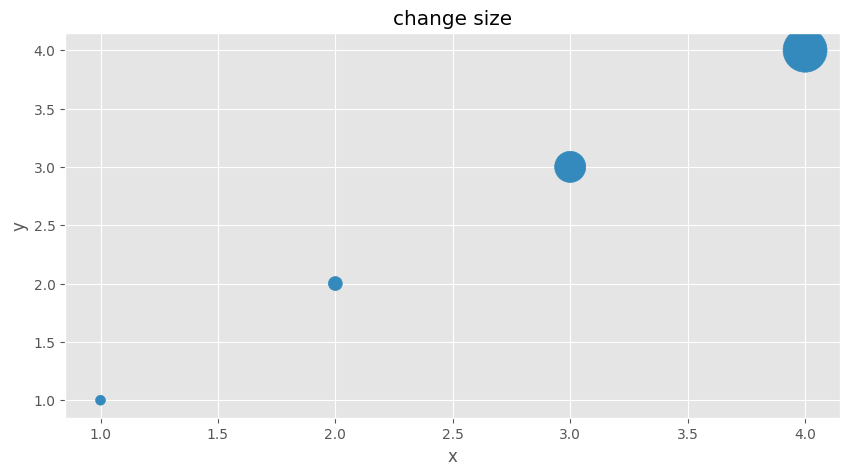

In [5]:
df = pd.DataFrame({
    'x':[1,2,3,4],
    'y':[1,2,3,4],
    's':[50,100,500,1000]
})

fig, ax = plt.subplots(figsize=(10,5))
df.plot(kind='scatter',x='x',y='y',s=df.s, ax=ax)
ax.set_title('change size')

Text(0.5, 1.0, 'change size')

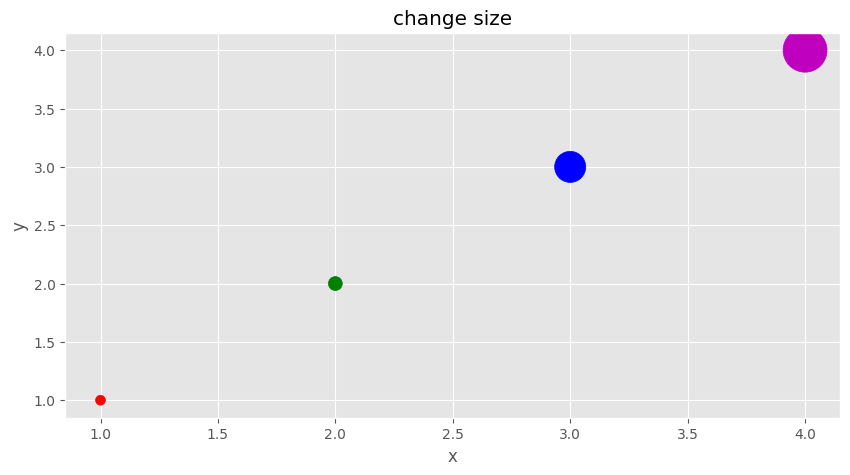

In [7]:
df = pd.DataFrame({
    'x':[1,2,3,4],
    'y':[1,2,3,4],
    's':[50,100,500,1000],
    'color':['r','g','b','m']
})

fig, ax = plt.subplots(figsize=(10,5))
df.plot(kind='scatter',x='x',y='y',s=df.s, c=df.color, ax=ax)
ax.set_title('change size')

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import display, Image, HTML
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('ggplot')
np.random.seed(37)

In [16]:
def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xlim(0, 2)
ax.set_ylim(-2, 2)
line, = ax.plot([], [], lw=1)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

plt.close(anim._fig)

HTML(anim.to_html5_video())

In [17]:
def data_gen():
    for cnt in range(1000):
        t = cnt / 10
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)

def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 10)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

fig, ax = plt.subplots(figsize=(8, 5))
line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []


def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

anim = animation.FuncAnimation(fig, run, data_gen, blit=False, interval=10,
                              repeat=True, init_func=init)

plt.close(anim._fig)

HTML(anim.to_html5_video())